# Library Importation, Please also update seaborn using command (!pip install seaborn --upgrade)

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns 
#!pip install seaborn --upgrade

# Data Importation, Exploration, Analysis and Cleaning

In [2]:
# Import data 
file='pone.0212445.s004.xlsx'
df = pd.read_excel (file, header = 1)

In [3]:
# Explore the size of the data set
df.shape

(104, 9)

In [4]:
#explore first 5 rows
df.head(5)

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789


In [5]:
#explore last 5 rows
df.tail(5)

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
99,Mangaung,MAN,Fay-Heriott,9.147425,6.725917,12.325536,101520,74646,136792
100,Nelson Mandela Bay Metro,NMA,Survey,8.300000,3.400000,13.200000,97459,39923,154995
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.054060,6.128703,13.179704,106313,71964,154757
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661
103,City of Tshwane,TSH,Fay-Heriott,11.024858,8.255934,14.574909,340593,255052,450265


In [6]:
# Identify the type of data in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   District        104 non-null    object 
 1   Code            104 non-null    object 
 2   Estimate        104 non-null    object 
 3   Prevalence_%    104 non-null    float64
 4   Prevalence_LCL  104 non-null    float64
 5   Prevalence_UCL  104 non-null    float64
 6   NoPLHIV         104 non-null    int64  
 7   NoPLHIV_LCL     104 non-null    int64  
 8   NoPLHIV_UCL     104 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 7.4+ KB


Check for null or missing values within the dataset

In [7]:
df.isnull().sum()

District          0
Code              0
Estimate          0
Prevalence_%      0
Prevalence_LCL    0
Prevalence_UCL    0
NoPLHIV           0
NoPLHIV_LCL       0
NoPLHIV_UCL       0
dtype: int64

Using the box and whisker diagrams to visualise outliers within the data set

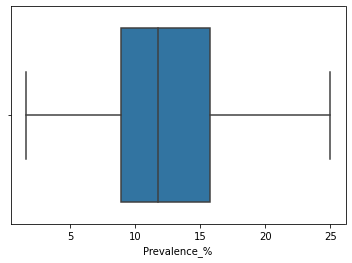

In [8]:
sns.boxplot(x=df['Prevalence_%'])

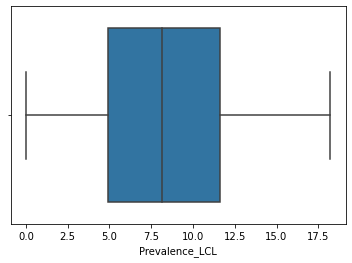

In [9]:
sns.boxplot(x=df['Prevalence_LCL'])

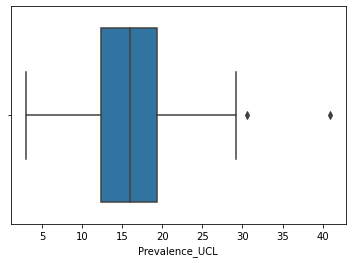

In [10]:
sns.boxplot(x=df['Prevalence_UCL'])

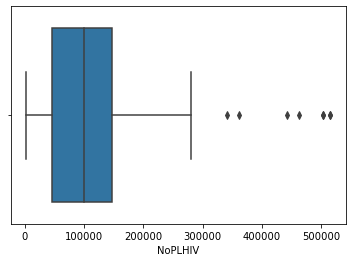

In [11]:
sns.boxplot(x=df['NoPLHIV'])

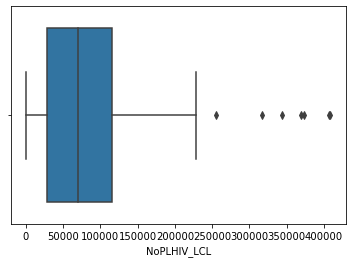

In [12]:
sns.boxplot(x=df['NoPLHIV_LCL'])

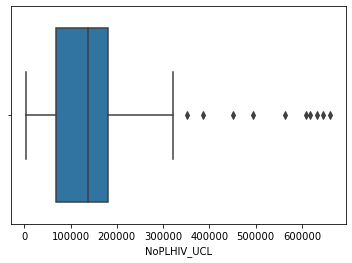

In [13]:
sns.boxplot(x=df['NoPLHIV_UCL'])

Count the number of outliers within each numerical column

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1  


#count the number of outliers in each column
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Code               0
District           0
Estimate           0
NoPLHIV            8
NoPLHIV_LCL        7
NoPLHIV_UCL       10
Prevalence_%       0
Prevalence_LCL     0
Prevalence_UCL     2
dtype: int64

# ANSWERS TO INTERVIEW QUESTIONS

# 2) Calculate and output the following:

a) What is the total number of people living with HIV (NoPLHIV) in the listed districts according to the Survey estimate?

The way we are to answer this question is to estimate these numbers separatly due to the method used to estimate these numbers i.e separate number of people living with HIV categoricaly using Direct Survey Domain and Fay-Heriott serparatly. 

Let first start with Direct Survey Domain estimates. To do this we create a new data frame that contains no estimates from Fay-Heriott by droping rows that have estimates calculated using the Fay-Heriott method.

In [15]:
i = df[(df.Estimate == 'Fay-Heriott')].index 
df_Survey=df.drop(i) 
df_Survey

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
0,Buffalo City,BUF,Survey,13.60,10.268000,16.932000,102437,77340,127534
2,City of Cape Town,CPT,Survey,5.20,3.044000,7.356000,200751,117517,283985
4,West Coast,DC1,Survey,2.70,0.000000,5.444000,11302,0,22789
6,Cacadu,DC10,Survey,7.60,3.484000,11.716000,34732,15922,53542
8,Amatole,DC12,Survey,11.00,7.276000,14.724000,98884,65407,132361
10,Chris Hani,DC13,Survey,14.30,10.184000,18.416000,114849,81792,147906
12,Joe Gqabi,DC14,Survey,10.70,7.956000,13.444000,37766,28081,47451
14,O.R. Tambo,DC15,Survey,11.80,8.468000,15.132000,160352,115073,205631
16,Xhariep,DC16,Survey,8.30,6.144000,10.456000,11777,8718,14836
18,Lejweleputswa,DC18,Survey,20.30,13.440000,27.160000,123868,82009,165727


Now that our new dataframe called df_Survey contains estimates from Direct Survey Domain method, we can now simply add the total number of indivduals living with HIV in the listed districts

In [16]:
Total_NoPLHIV = df_Survey['NoPLHIV'].sum() 
Total_NoPLHIV

6409903

The same rule will apply if we are to calculate the total estimates of individuals living with HIV using the Fay-Heriott method. To do this we create a new data frame that contains no estimates from Direct Survey Domain by droping rows that have estimates calculated using the Direct Survey Domain method. 

In [17]:
j = df[(df.Estimate == 'Survey')].index 
df_Fay_Heriott=df.drop(j) 
df_Fay_Heriott

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548
5,West Coast,DC1,Fay-Heriott,4.088319,2.414351,6.841548,17114,10107,28639
7,Cacadu,DC10,Fay-Heriott,8.912387,6.145010,12.756646,40729,28083,58298
9,Amatole,DC12,Fay-Heriott,11.878608,9.090702,15.376883,106783,81721,138230
11,Chris Hani,DC13,Fay-Heriott,14.080983,11.181220,17.583893,113090,89801,141224
13,Joe Gqabi,DC14,Fay-Heriott,11.507804,9.291766,14.169794,40618,32796,50013
15,O.R. Tambo,DC15,Fay-Heriott,12.317316,9.771988,15.412383,167382,132793,209441
17,Xhariep,DC16,Fay-Heriott,8.963070,7.187823,11.124214,12718,10199,15784
19,Lejweleputswa,DC18,Fay-Heriott,17.628286,13.677049,22.424487,107566,83456,136832


Now that our new dataframe called df_Fay_Heriott contains estimates from Fay_Heriott method, we can now simply add the total number of indivduals living with HIV in the listed districts as before

In [18]:
Total_NoPLHIV = df_Fay_Heriott['NoPLHIV'].sum() 
Total_NoPLHIV

6477177

In conclusion the total number of individual living with HIV using the Direct Survey Domain estimate is 6409903 whilst the total using Fay_Heriott method is 6477177 

b) What is the average NoPLHIV of the two estimates used for “Xhariep”?

This can be done removing all rows without the district name “Xhariep”, and than storing the results in a new dataframe called df_Xhariep, and than finding the average

In [19]:
df_Xhariep = df.drop(df[df.District != 'Xhariep'].index) 
df_Xhariep

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL
16,Xhariep,DC16,Survey,8.30000,6.144000,10.456000,11777,8718,14836
17,Xhariep,DC16,Fay-Heriott,8.96307,7.187823,11.124214,12718,10199,15784


Now lets calculate the average NoPLHIV of the two estimates

In [20]:
Average=df['NoPLHIV'].mean() 
Average

123914.23076923077

Thefore the average is at 12247.5 for the two estimate methods for the district of Xhariep 

c) Add a column and populate it with the number of people not living with HIV for each row

Now to answer this question, we need to know the estimated total population for each district, however, in this case we have no column with the total population for each district. Therefore we will need to go the https://municipalities.co.za/ website and search district by district using the district code because using the district name could pose a problem since in some cases district names can be changed by the government over time. For example district Cacadu is now called Sarah Baartman District Municipality, and searching Cacadu might lead to incorrect results. The population data used in this case is for 2016, since the 2021 data has not been updated yet. 

Next we create a new column titled Total_Population for each district, since two different methods were used to estimate the number of individuals who have HIV, the population value will be recorded twice to ease with the calculations. After creating the new column, we will simply subtract the rows concurently of the number of individual who have HIV(NoPLHIV) column from newly created Total_Population column, and store it in another new column created to store the total number of individuals not living with HIV. 

In [21]:
#create a list that contains the total population value for each district in 2016 as an integer 
total_population=[834997,834997,4005016,4005016,436403, 436403,479923,479923,880790,880790,840005,840055, 372912,372912,1457384,1457384,124884,124884,646920,646920,779330,779330,866001,866001,494777,494777,753336,753336,1095865,1095865,706588,706588, 
                 554882,554882,531327,531327, 892310,892310,689090,689090,971135,971135,657612,657612,286786, 286786,1135409,1135409,1445624,1445624,1754931,1754931,1159185,1159185,1393949,1393949,1330436,1330436,745758,745758,1657148,1657148, 
                 889108,889108,459357,459357,611278,611278,742821,742821,957528,957528,510865,510865,867864,867864,242264,242264,1169762,1169762,838594,838594,74247,74247,115488,115488,195595,195595,252692, 252692,387741, 387741, 3379104,3379104, 
                 3702231, 3702231,4949347,4949347,787803,787803,1263051,1263051,3275152,3275152] 

#insert list to the dataframe
df['Total_Population'] = total_population 

In [22]:
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,Total_Population
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,834997
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,834997
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,4005016
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,4005016
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,436403


In [23]:
df.tail()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,Total_Population
99,Mangaung,MAN,Fay-Heriott,9.147425,6.725917,12.325536,101520,74646,136792,787803
100,Nelson Mandela Bay Metro,NMA,Survey,8.300000,3.400000,13.200000,97459,39923,154995,1263051
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.054060,6.128703,13.179704,106313,71964,154757,1263051
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661,3275152
103,City of Tshwane,TSH,Fay-Heriott,11.024858,8.255934,14.574909,340593,255052,450265,3275152


From the results above we can see that we have succesfully integrated the Total_Population column into the original dataset. Now its time to add new a column that contains the number of people not infected by HIV in each district with corresponding estimate method used. The new column name will be abbreviated NoPNLHIV number of people not living with HIV. 

In [24]:
df['NoPNLHIV'] = df['Total_Population'] - df['NoPLHIV'] 

In [25]:
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,Total_Population,NoPNLHIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,834997,732560
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,834997,733304
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,4005016,3804265
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,4005016,3772607
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,436403,425101


In [26]:
df.tail()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,Total_Population,NoPNLHIV
99,Mangaung,MAN,Fay-Heriott,9.147425,6.725917,12.325536,101520,74646,136792,787803,686283
100,Nelson Mandela Bay Metro,NMA,Survey,8.300000,3.400000,13.200000,97459,39923,154995,1263051,1165592
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.054060,6.128703,13.179704,106313,71964,154757,1263051,1156738
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661,3275152,2913702
103,City of Tshwane,TSH,Fay-Heriott,11.024858,8.255934,14.574909,340593,255052,450265,3275152,2934559


Now that we have created a new column and populated it with the number of people not living with HIV for each row, we can now simply drop the Total_Population column since it is no longer needed.

In [27]:
df = df.drop('Total_Population', 1)

In [28]:
df.head()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,NoPNLHIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,732560
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,733304
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3804265
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3772607
4,West Coast,DC1,Survey,2.700000,0.000000,5.444000,11302,0,22789,425101


In [29]:
df.tail()

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,NoPNLHIV
99,Mangaung,MAN,Fay-Heriott,9.147425,6.725917,12.325536,101520,74646,136792,686283
100,Nelson Mandela Bay Metro,NMA,Survey,8.300000,3.400000,13.200000,97459,39923,154995,1165592
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.054060,6.128703,13.179704,106313,71964,154757,1156738
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661,2913702
103,City of Tshwane,TSH,Fay-Heriott,11.024858,8.255934,14.574909,340593,255052,450265,2934559


d) What is the total NoPLHIV in all the cities (districts with the word “city” or “metro” in the name)? 

To answer this question we simply need to drop rows where the District column contains no phrases "city" or "metro" respectively. In this scenario, we will create two new data frames called df_city and df_metro which will only contain districts with phrases "city" or "metro" respectively, and then we will simply add up the rows within the NoPLHIV column of each dataframe, and finally sum up the overall total result.

In [30]:
k = df[(~df['District'].str.contains("City"))].index 
df_city=df.drop(k)  
df_city

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,NoPNLHIV
0,Buffalo City,BUF,Survey,13.600000,10.268000,16.932000,102437,77340,127534,732560
1,Buffalo City,BUF,Fay-Heriott,13.501283,11.031605,16.421802,101693,83092,123691,733304
2,City of Cape Town,CPT,Survey,5.200000,3.044000,7.356000,200751,117517,283985,3804265
3,City of Cape Town,CPT,Fay-Heriott,6.020043,4.335072,8.303091,232409,167359,320548,3772607
96,City of Johannesburg,JHB,Survey,11.100000,7.964000,14.236000,515387,369778,660996,4433960
97,City of Johannesburg,JHB,Fay-Heriott,11.075306,8.760104,13.909111,514241,406743,645818,4435106
102,City of Tshwane,TSH,Survey,11.700000,7.388000,16.012000,361450,228239,494661,2913702
103,City of Tshwane,TSH,Fay-Heriott,11.024858,8.255934,14.574909,340593,255052,450265,2934559


In [31]:
Total_city= df_city['NoPLHIV'].sum()
Total_city

2368961

In [32]:
l = df[(~df['District'].str.contains("Metro"))].index 
df_metro=df.drop(l) 
df_metro

,District,Code,Estimate,Prevalence_%,Prevalence_LCL,Prevalence_UCL,NoPLHIV,NoPLHIV_LCL,NoPLHIV_UCL,NoPNLHIV
100,Nelson Mandela Bay Metro,NMA,Survey,8.30000,3.400000,13.200000,97459,39923,154995,1165592
101,Nelson Mandela Bay Metro,NMA,Fay-Heriott,9.05406,6.128703,13.179704,106313,71964,154757,1156738


In [33]:
Total_metro= df_metro['NoPLHIV'].sum()
Total_metro

203772

In [34]:
Total_Cities=Total_metro+Total_city 
Total_Cities

2572733

From the above results we can see that the total number of people living in cities is 2572733 

# 3) Write the original data (without the caption - originally row 1) with the extra columns as comma-separated values (CSV) to a new .csv file

In [36]:
file_name='new.csv'
df.to_csv(file_name, sep=';', index=False)